In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

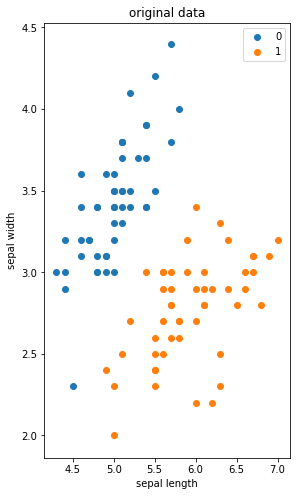

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

plt.figure(figsize=(15, 8))
plt.subplot(131)
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('original data')
plt.legend()

In [3]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [4]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
    
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    #梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

In [5]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

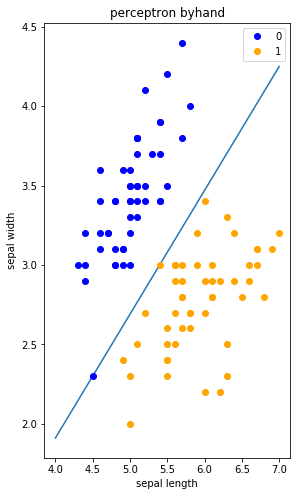

In [6]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.figure(figsize=(15, 8))
plt.subplot(132)
plt.plot(x_points, y_)
plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0') #用scatter也可以
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('perceptron byhand')
plt.legend()

In [7]:
# sklearn模型
from sklearn.linear_model import Perceptron

In [8]:
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True) #fit_intercept截距
clf.fit(X, y)

Perceptron()

[[ 23.2 -38.7]]
[-5.]


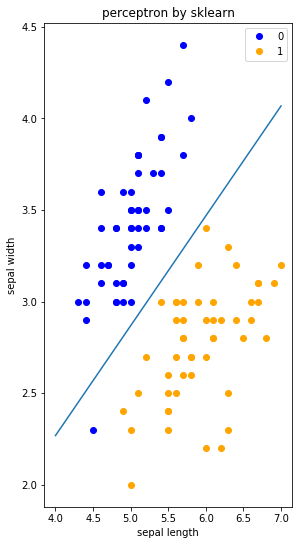

In [9]:
plt.figure(figsize=(15, 8))
# Weights assigned to the features.
print(clf.coef_) #二维array
# 截距 Constants in decision function.
print(clf.intercept_)
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.subplot(133)
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('perceptron by sklearn')
plt.legend()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35) #调整子图间距
plt.show()